<a href="https://colab.research.google.com/github/kececidilara/kececidilara.github.io/blob/master/ANN_Air_Quality_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import numpy as np

In [ ]:
from csv import reader
import math
print("pm2.5")
datasetpm25 = []

with open('pm2.5try.csv', 'r') as file:
    csv_reader = reader(file, delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        arr = [row[0], row[1], row[2], row[3], row[4], row[5],row[6], row[7], row[8], row[9], row[10]]
        datasetpm25.append(arr)
        for i in datasetpm25:
            print(i)

print("NO2")

datasetno2 = []
with open('NO2 normalization.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        arr = [row[0], row[1], row[2], row[3], row[4], row[5],row[6], row[7], row[8], row[9], row[10]]
        datasetno2.append(arr)
        for i in datasetno2:
            print(i)

print("O3")
dataseto3 = []
with open('O3normalization.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        arr = [row[0], row[1], row[2], row[3], row[4], row[5],row[6], row[7], row[8], row[9], row[10]]
        dataseto3.append(arr)
        for i in dataseto3:
            print(i)
print("PM2.5")



data_xpm25 = []
data_ypm25 = []
city = 0
#pm2.5
for index in range(len(datasetpm25[city])-5):
  data_xpm25.append(datasetpm25[city][index+1:index+5])
  data_ypm25.append(datasetpm25[city][index+5])

print(data_xpm25)
print(data_ypm25)


In [ ]:
x = np.array(data_xpm25).astype(float)
y = np.array(data_ypm25).astype(float)

In [ ]:
net = torch.nn.Sequential(
        torch.nn.Linear(4, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 1
EPOCH = 200

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

loss_values = []

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        loss_values.append(loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


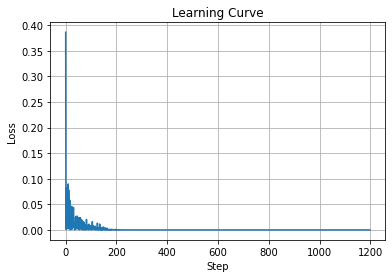

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.title('Learning Curve')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid('on')

[6.627378940582275, 5.535835266113281, 4.968212127685547, 3.967571496963501, 2.7889747619628906]


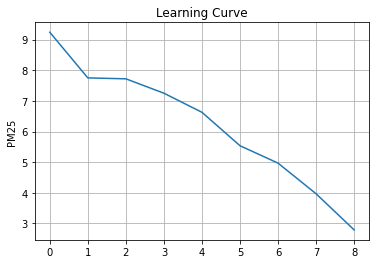

In [ ]:
def invert_normalization(prediction,max,min):
  return prediction*(max-min)+min 

def normalize(arr,max,min):
  return [(value-min)/(max-min) for value in arr ]

def predict(arr,max,min,n_year):
  predictions = []
  for year in range(n_year):

    arr_normalized = np.array(normalize(arr,max,min))
    arr_tensor = torch.FloatTensor(arr_normalized)
    prediction_normalized = net(arr_tensor)
    prediction = invert_normalization(prediction_normalized,max,min)
    predictions.append(float(prediction))
    arr = arr[1:]
    arr.append(float(prediction))
  return predictions

max = 11.05
min = 7.25
test = [9.24, 7.75, 7.72, 7.25]
predictions = predict(test,max,min,5)
print(predictions)

import matplotlib.pyplot as plt
plt.plot(test + predictions)
plt.title('Learning Curve')
plt.ylabel('PM25')
plt.grid('on')
